<a href="https://colab.research.google.com/github/Nargiz-chess/Solar_forecasting/blob/main/German_dataset_EDA%26preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# German (Konstanz) dataset 

documentation: https://nbviewer.jupyter.org/github/isc-konstanz/household_data/blob/2020-04-15/main.ipynb

Data source: https://data.open-power-system-data.org/household_data/2020-04-15


Total Photovoltaic energy generation in kWh


#Notes

- The values are cumulative - instead should be values for a certain hour of a day
- Match hours with UTC of both datasets when combined
- Pipeline for models and parameters

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = '/content/drive/MyDrive/Master_thesis/Datasets/household_data_60min_singleindex.csv'

Mounted at /content/drive


In [ ]:
GERdata = read_csv(path, header=0, parse_dates=[0], index_col=0, squeeze=True) # the first column, utc time, is an index column 

In [ ]:
GERdata.head()

,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,DE_KN_industrial3_area_room_3,DE_KN_industrial3_area_room_4,DE_KN_industrial3_compressor,DE_KN_industrial3_cooling_aggregate,DE_KN_industrial3_cooling_pumps,DE_KN_industrial3_dishwasher,DE_KN_industrial3_ev,DE_KN_industrial3_grid_import,DE_KN_industrial3_machine_1,DE_KN_industrial3_machine_2,DE_KN_industrial3_machine_3,DE_KN_industrial3_machine_4,DE_KN_industrial3_machine_5,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_industrial3_refrigerator,DE_KN_industrial3_ventilation,DE_KN_public1_grid_import,DE_KN_public2_grid_import,DE_KN_residential1_dishwasher,DE_KN_residential1_freezer,DE_KN_residential1_grid_import,DE_KN_residential1_heat_pump,DE_KN_residential1_pv,DE_KN_residential1_washing_machine,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,interpolated
utc_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-11 17:00:00+00:00,2014-12-11T18:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11 18:00:00+00:00,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063,0.003,0.024,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11 19:00:00+00:00,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132,0.005,0.064,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11 20:00:00+00:00,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,0.008,0.102,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11 21:00:00+00:00,2014-12-11T22:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269,0.010,0.106,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Removing non-solar-generation columns, keeping utc and cest columns
for col in GERdata.columns:
  if "cet_cest_timestamp" in col:
    pass
  elif "pv" not in col:
    GERdata = GERdata.drop(col, axis=1)

GERdata.head()
print(GERdata.columns)

Index(['cet_cest_timestamp', 'DE_KN_industrial1_pv_1',
       'DE_KN_industrial1_pv_2', 'DE_KN_industrial2_pv',
       'DE_KN_industrial3_pv_facade', 'DE_KN_industrial3_pv_roof',
       'DE_KN_residential1_pv', 'DE_KN_residential3_pv',
       'DE_KN_residential4_pv', 'DE_KN_residential6_pv'],
      dtype='object')


In [ ]:
GERdata.index = pd.to_datetime(GERdata.index)  # converting index (utc_timestamp) to datetime format of pandas
GERdata['Berlin_time']= GERdata.index.tz_convert('Europe/Berlin')

GERdata.head()
#GERdata.info()

,cet_cest_timestamp,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv,Berlin_time
utc_timestamp,,,,,,,,,,,
2014-12-11 17:00:00+00:00,2014-12-11T18:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-11 18:00:00+01:00
2014-12-11 18:00:00+00:00,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-11 19:00:00+01:00
2014-12-11 19:00:00+00:00,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-11 20:00:00+01:00
2014-12-11 20:00:00+00:00,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-11 21:00:00+01:00
2014-12-11 21:00:00+00:00,2014-12-11T22:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-11 22:00:00+01:00


In [ ]:
GERdata.info()  #DatetimeIndex: 38454 entries, 2014-12-11 17:00:00+00:00 to 2019-05-01 22:00:00+00:00

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38454 entries, 2014-12-11 17:00:00+00:00 to 2019-05-01 22:00:00+00:00
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype                        
---  ------                       --------------  -----                        
 0   cet_cest_timestamp           38454 non-null  object                       
 1   DE_KN_industrial1_pv_1       17288 non-null  float64                      
 2   DE_KN_industrial1_pv_2       17288 non-null  float64                      
 3   DE_KN_industrial2_pv         12000 non-null  float64                      
 4   DE_KN_industrial3_pv_facade  14360 non-null  float64                      
 5   DE_KN_industrial3_pv_roof    14360 non-null  float64                      
 6   DE_KN_residential1_pv        15873 non-null  float64                      
 7   DE_KN_residential3_pv        22555 non-null  float64                      
 8   DE_KN_residential4_pv        20360 non-

#Visualisation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f565bace710>,
      dtype=object)

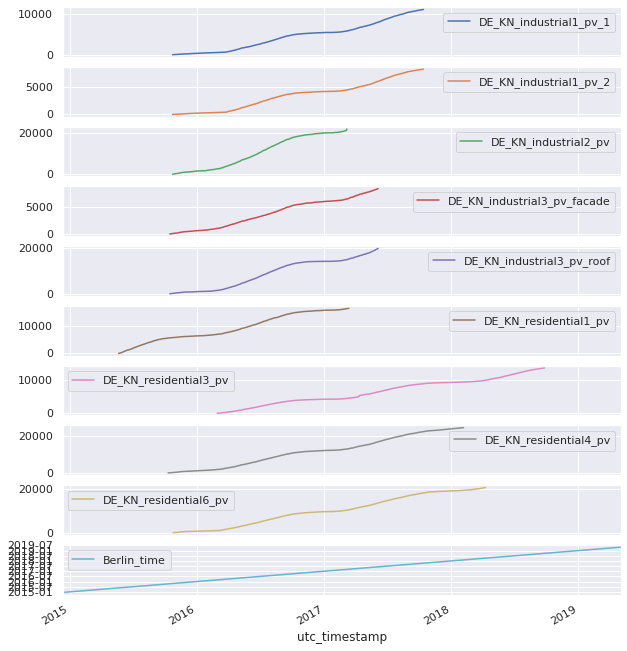

In [ ]:
GERdata.plot(subplots=True, figsize=(10,12))

In [ ]:
GERdata.index

DatetimeIndex(['2014-12-11 17:00:00+00:00', '2014-12-11 18:00:00+00:00',
               '2014-12-11 19:00:00+00:00', '2014-12-11 20:00:00+00:00',
               '2014-12-11 21:00:00+00:00', '2014-12-11 22:00:00+00:00',
               '2014-12-11 23:00:00+00:00', '2014-12-12 00:00:00+00:00',
               '2014-12-12 01:00:00+00:00', '2014-12-12 02:00:00+00:00',
               ...
               '2019-05-01 13:00:00+00:00', '2019-05-01 14:00:00+00:00',
               '2019-05-01 15:00:00+00:00', '2019-05-01 16:00:00+00:00',
               '2019-05-01 17:00:00+00:00', '2019-05-01 18:00:00+00:00',
               '2019-05-01 19:00:00+00:00', '2019-05-01 20:00:00+00:00',
               '2019-05-01 21:00:00+00:00', '2019-05-01 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='utc_timestamp', length=38454, freq=None)

<BarContainer object of 41 artists>

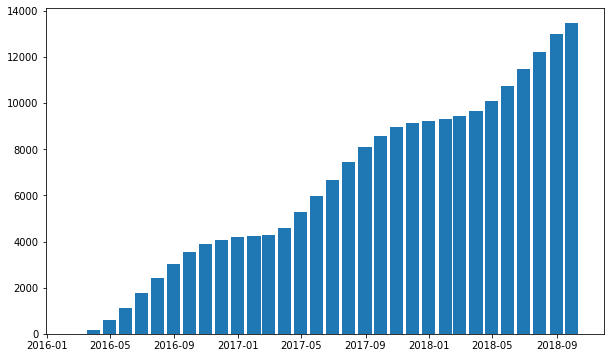

In [ ]:
#seasonality

GERdata_month = GERdata.resample("M").mean()

fig, ax = plt.subplots(figsize=(10, 6))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(GERdata_month['2016':].index, GERdata_month.loc['2016':, "DE_KN_residential3_pv"], width=25, align='center')

In [ ]:
# remove periods that inaccurate (from February 2016 according to the data description) and is missing. Also last years??

# removing from utc_timestamp (index) but adjusted time to Berlin_date so that we have from Feb 1 2016 to Feb 1 2017
GERdata = GERdata.loc['2016-01-31 23:00:00+00:00' : '2017-01-31 23:00:00+00:00']

GERdata.head()

,cet_cest_timestamp,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv,Berlin_time
utc_timestamp,,,,,,,,,,,
2016-01-31 23:00:00+00:00,2016-02-01T00:00:00+0100,453.83,307.265,1901.32,748.02,1050.692,6612.712,NaN,1447.865,820.002,2016-02-01 00:00:00+01:00
2016-02-01 00:00:00+00:00,2016-02-01T01:00:00+0100,453.83,307.265,1901.32,748.02,1050.692,6612.712,NaN,1447.865,820.002,2016-02-01 01:00:00+01:00
2016-02-01 01:00:00+00:00,2016-02-01T02:00:00+0100,453.83,307.265,1901.32,748.02,1050.692,6612.712,NaN,1447.865,820.002,2016-02-01 02:00:00+01:00
2016-02-01 02:00:00+00:00,2016-02-01T03:00:00+0100,453.83,307.265,1901.32,748.02,1050.692,6612.712,NaN,1447.865,820.002,2016-02-01 03:00:00+01:00
2016-02-01 03:00:00+00:00,2016-02-01T04:00:00+0100,453.83,307.265,1901.32,748.02,1050.692,6612.712,NaN,1447.865,820.002,2016-02-01 04:00:00+01:00


In [ ]:
# As we can see from the graphs, values are not actual but cumulative. Here we substract every value from the previous period
# the first row is turned to zero to ignore cumulative values before February 2016. 

for col in GERdata.columns:
  if col!= "cet_cest_timestamp" and col!= "Berlin_time":
    GERdata[col] = GERdata[col].sub(GERdata[col].shift()) #substracting values from the previous value
    GERdata[col].iloc[0] = 0     #removing accumulated value from the previous hour because it is hour from the midnight (there is no sunlight anyway)


GERdata.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,cet_cest_timestamp,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv,Berlin_time
utc_timestamp,,,,,,,,,,,
2016-01-31 23:00:00+00:00,2016-02-01T00:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,2016-02-01 00:00:00+01:00
2016-02-01 00:00:00+00:00,2016-02-01T01:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 01:00:00+01:00
2016-02-01 01:00:00+00:00,2016-02-01T02:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 02:00:00+01:00
2016-02-01 02:00:00+00:00,2016-02-01T03:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 03:00:00+01:00
2016-02-01 03:00:00+00:00,2016-02-01T04:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 04:00:00+01:00
2016-02-01 04:00:00+00:00,2016-02-01T05:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 05:00:00+01:00
2016-02-01 05:00:00+00:00,2016-02-01T06:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 06:00:00+01:00
2016-02-01 06:00:00+00:00,2016-02-01T07:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 07:00:00+01:00
2016-02-01 07:00:00+00:00,2016-02-01T08:00:00+0100,0.000,0.000,0.692,0.067,0.007,0.291,NaN,0.367,0.000,2016-02-01 08:00:00+01:00


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4661e73750>,
      dtype=object)

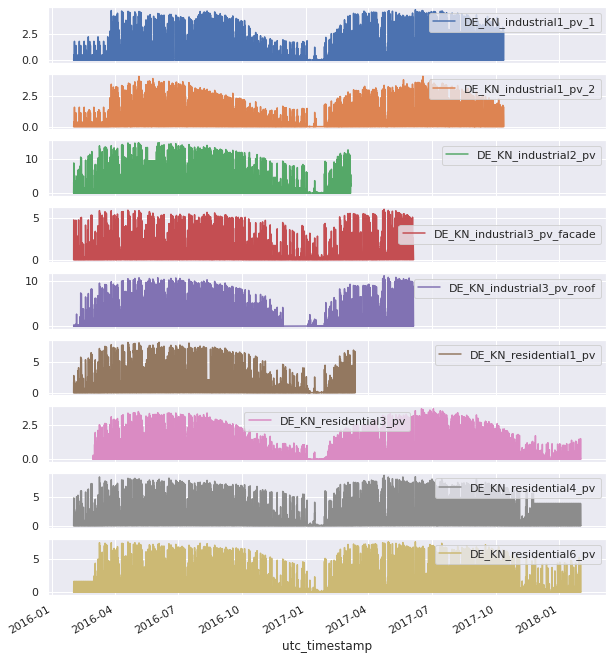

In [ ]:
GERdata.plot(subplots=True, figsize=(10,12))

In [ ]:
# extract year, month, day, time from the data and create new columns 

GERdata["Year"] = GERdata["Berlin_time"].dt.year
GERdata["Month"] = GERdata["Berlin_time"].dt.month
GERdata["Season"] = GERdata["Berlin_time"].dt.quarter
GERdata["Week"] = GERdata["Berlin_time"].dt.week
GERdata["Day"] = GERdata["Berlin_time"].dt.day
GERdata["Year_day"] = GERdata["Berlin_time"].dt.dayofyear
GERdata["Hour"] = GERdata["Berlin_time"].dt.hour

GERdata.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,cet_cest_timestamp,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv,Berlin_time,Year,Month,Season,Week,Day,Year_day,Hour
utc_timestamp,,,,,,,,,,,,,,,,,,
2016-01-31 23:00:00+00:00,2016-02-01T00:00:00+0100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-02-01 00:00:00+01:00,2016,2,1,5,1,32,0
2016-02-01 00:00:00+00:00,2016-02-01T01:00:00+0100,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2016-02-01 01:00:00+01:00,2016,2,1,5,1,32,1
2016-02-01 01:00:00+00:00,2016-02-01T02:00:00+0100,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2016-02-01 02:00:00+01:00,2016,2,1,5,1,32,2
2016-02-01 02:00:00+00:00,2016-02-01T03:00:00+0100,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2016-02-01 03:00:00+01:00,2016,2,1,5,1,32,3
2016-02-01 03:00:00+00:00,2016-02-01T04:00:00+0100,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2016-02-01 04:00:00+01:00,2016,2,1,5,1,32,4


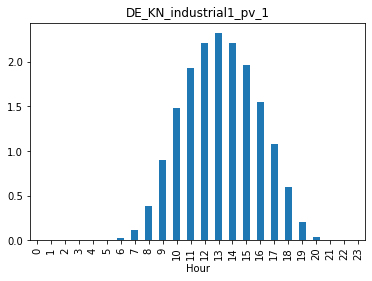

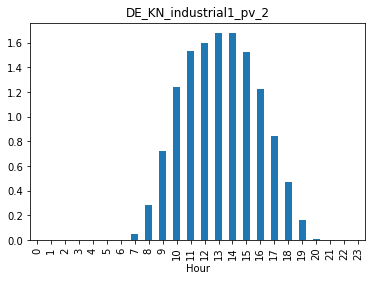

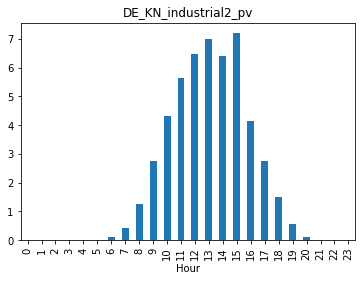

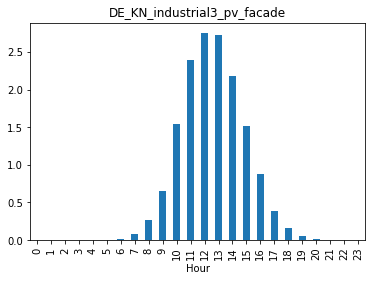

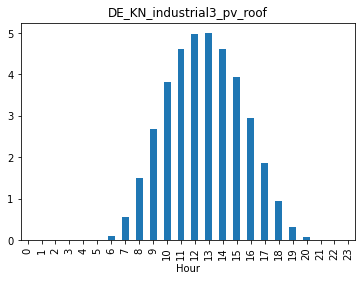

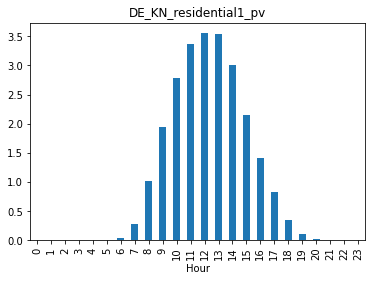

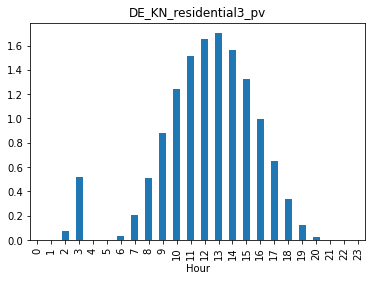

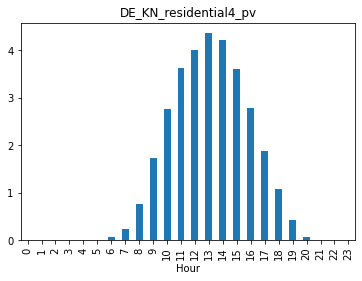

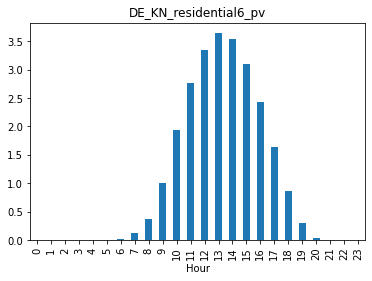

In [ ]:
#visualize hourly data

for col in GERdata.columns:
  if "pv" in col:  #only taking into account the pv-related columns 
    GERdata[col].groupby(GERdata["Hour"]).mean().plot(kind="bar", title = col)
    plt.show()



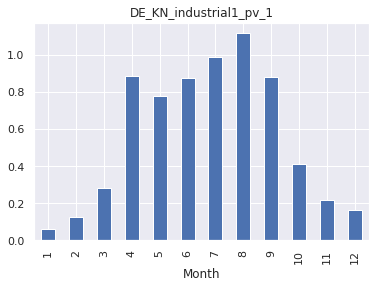

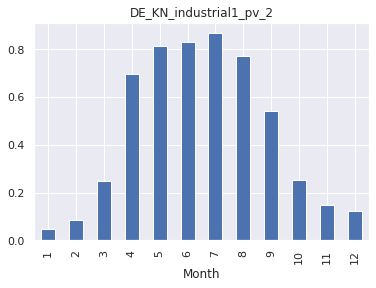

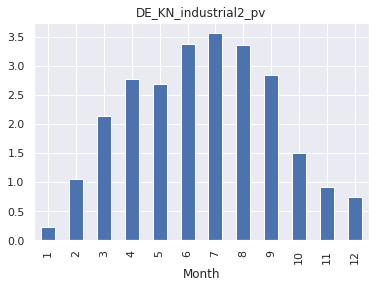

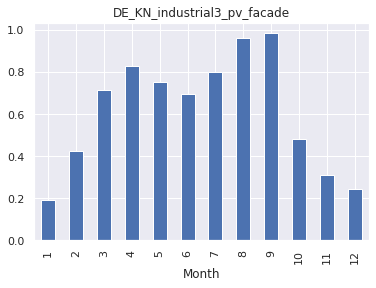

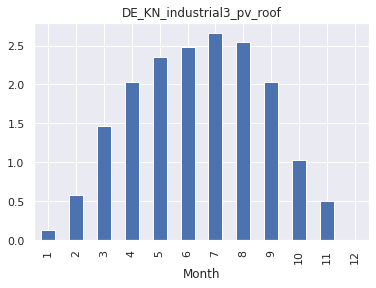

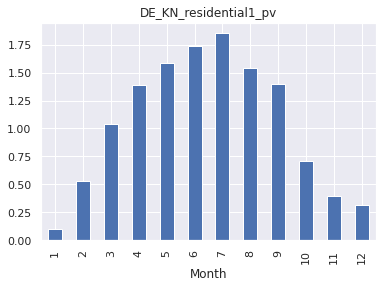

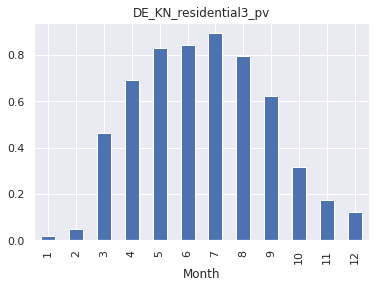

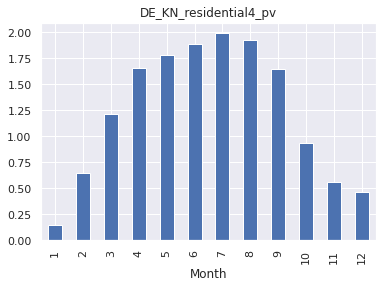

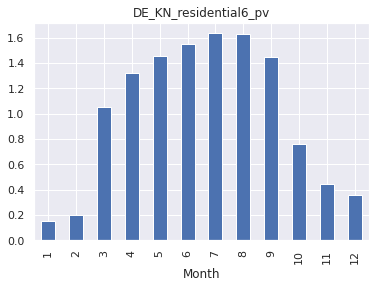

In [ ]:
#monthly solar power generation

for col in GERdata.columns:
  if "pv" in col:  #only taking into account the pv-related columns 
    GERdata[col].groupby(GERdata["Month"]).mean().plot(kind="bar", title = col)
    plt.show()

In [ ]:
# removed values outside of 6:00 and 22:00 local time - Berlin_time (which means between 5:00 and 19:00 by UTC)
GERdata = GERdata.between_time('04:00','21:00')

GERdata.head(20)

,cet_cest_timestamp,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv,Berlin_time,Year,Month,Season,Week,Day,Year_day,Hour
utc_timestamp,,,,,,,,,,,,,,,,,,
2016-02-01 04:00:00+00:00,2016-02-01T05:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 05:00:00+01:00,2016,2,1,5,1,32,5
2016-02-01 05:00:00+00:00,2016-02-01T06:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 06:00:00+01:00,2016,2,1,5,1,32,6
2016-02-01 06:00:00+00:00,2016-02-01T07:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 07:00:00+01:00,2016,2,1,5,1,32,7
2016-02-01 07:00:00+00:00,2016-02-01T08:00:00+0100,0.000,0.000,0.692,0.067,0.007,0.291,NaN,0.367,0.000,2016-02-01 08:00:00+01:00,2016,2,1,5,1,32,8
2016-02-01 08:00:00+00:00,2016-02-01T09:00:00+0100,0.020,0.000,2.712,0.813,0.063,1.258,NaN,1.628,0.038,2016-02-01 09:00:00+01:00,2016,2,1,5,1,32,9
2016-02-01 09:00:00+00:00,2016-02-01T10:00:00+0100,0.320,0.195,3.113,3.284,0.135,1.677,NaN,1.813,0.607,2016-02-01 10:00:00+01:00,2016,2,1,5,1,32,10
2016-02-01 10:00:00+00:00,2016-02-01T11:00:00+0100,0.430,0.335,2.712,4.770,0.233,1.453,NaN,1.792,0.430,2016-02-01 11:00:00+01:00,2016,2,1,5,1,32,11
2016-02-01 11:00:00+00:00,2016-02-01T12:00:00+0100,0.240,0.120,8.733,4.363,0.232,2.779,NaN,4.832,1.632,2016-02-01 12:00:00+01:00,2016,2,1,5,1,32,12
2016-02-01 12:00:00+00:00,2016-02-01T13:00:00+0100,0.195,0.085,7.178,4.056,0.246,2.383,NaN,4.081,0.555,2016-02-01 13:00:00+01:00,2016,2,1,5,1,32,13


In [ ]:
drop_cols = [i for i in range(10,18)]
drop_cols.append(0)

#GERdata =GERdata.drop(GERdata.columns[drop_cols],axis=1)

GERdata.columns

Index(['DE_KN_industrial1_pv_1', 'DE_KN_industrial1_pv_2',
       'DE_KN_industrial2_pv', 'DE_KN_industrial3_pv_facade',
       'DE_KN_industrial3_pv_roof', 'DE_KN_residential1_pv',
       'DE_KN_residential3_pv', 'DE_KN_residential4_pv',
       'DE_KN_residential6_pv'],
      dtype='object')

# Outliers

Some notes from Describe:
- outlier in DE_KN_residential3_pv ==> solar generation at night but this period has been removed from the model anyway
print(GERdata.isna().sum())

- minimum is zero is all columns (no negative number)

In [ ]:
GERdata.describe()



,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv
count,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6089.000000,6588.000000,6588.000000
mean,0.755178,0.604367,2.795527,0.820720,1.976530,1.399153,0.693404,1.650505,1.337562
std,1.171029,0.933139,3.856470,1.375375,2.834778,2.085051,0.932180,2.261753,1.996936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.103000,0.028500,0.731000,0.152000,0.348000,0.294000,0.198000,0.424000,0.234000
75%,1.113500,0.920000,4.554750,0.951500,3.178500,1.974250,1.140000,2.695250,1.890500
max,4.670000,4.160000,14.600000,5.943000,10.663000,8.197000,3.524000,8.495000,7.630000


In [ ]:
for col in GERdata.columns:
  if "pv" in col:
    print(GERdata[col].nlargest(n=10))

utc_timestamp
2016-03-26 11:00:00+00:00    4.670
2016-03-26 12:00:00+00:00    4.630
2016-08-11 11:00:00+00:00    4.630
2016-04-10 11:00:00+00:00    4.627
2016-04-10 12:00:00+00:00    4.593
2016-04-19 11:00:00+00:00    4.591
2016-08-01 12:00:00+00:00    4.583
2016-05-05 12:00:00+00:00    4.580
2016-04-20 10:00:00+00:00    4.575
2016-04-19 10:00:00+00:00    4.560
Name: DE_KN_industrial1_pv_1, dtype: float64
utc_timestamp
2016-05-05 09:00:00+00:00    4.160
2016-05-05 10:00:00+00:00    4.020
2016-05-25 09:00:00+00:00    3.978
2016-05-04 09:00:00+00:00    3.790
2016-05-06 09:00:00+00:00    3.790
2016-05-20 10:00:00+00:00    3.780
2016-05-18 09:00:00+00:00    3.758
2016-05-25 10:00:00+00:00    3.750
2016-06-17 09:00:00+00:00    3.750
2016-05-20 09:00:00+00:00    3.742
Name: DE_KN_industrial1_pv_2, dtype: float64
utc_timestamp
2016-06-03 10:00:00+00:00    14.600
2016-05-04 12:00:00+00:00    14.539
2016-06-01 11:00:00+00:00    14.539
2016-04-19 12:00:00+00:00    14.536
2016-06-03 11:00:00+00:0

In [ ]:
# CANCELLED: there was a very large value in year of 2018. Because of too many values, only one year data was kept (2016-2017). 
#2017-2018 was removed with that the large value was removed as well

# discovering neighbour days and other houses, comparing with the index that has outlier as 666.849

# replace 666.849000 from  DE_KN_industrial2_pv with the value at the same time of the previous day (2.615)

#np.argmax(GERdata['DE_KN_industrial2_pv'])

# GERdata=GERdata.replace(GERdata.iloc[7191,2],2.615)
# GERdata.describe()

#Missing values

In [ ]:
print("Missing values by % ","\n","\n",round(GERdata.isnull().sum()/len(GERdata)*100,0))

#GERdata = GERdata.fillna(0)

Missing values by %  
 
 DE_KN_industrial1_pv_1         0.0
DE_KN_industrial1_pv_2         0.0
DE_KN_industrial2_pv           0.0
DE_KN_industrial3_pv_facade    0.0
DE_KN_industrial3_pv_roof      0.0
DE_KN_residential1_pv          0.0
DE_KN_residential3_pv          8.0
DE_KN_residential4_pv          0.0
DE_KN_residential6_pv          0.0
dtype: float64


#Some other visuals 

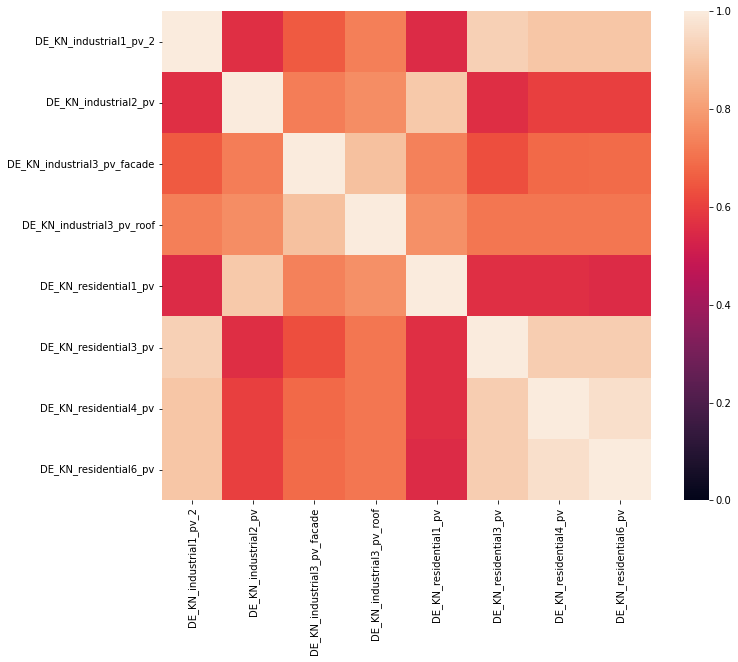

In [ ]:
# Plot the Correlation map to see how features are correlated with target: SalePrice
import seaborn as sns

only_pv_cols = GERdata.iloc[:,1:11]

corr_matrix = only_pv_cols.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmin=0, vmax=1, square=True, fmt='.2f', annot_kws={'size': 10})

# all other variables are highly correlated which is logical: when there is a sun, all of generate sun power, 
#all of them stop generating when the sun is down

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


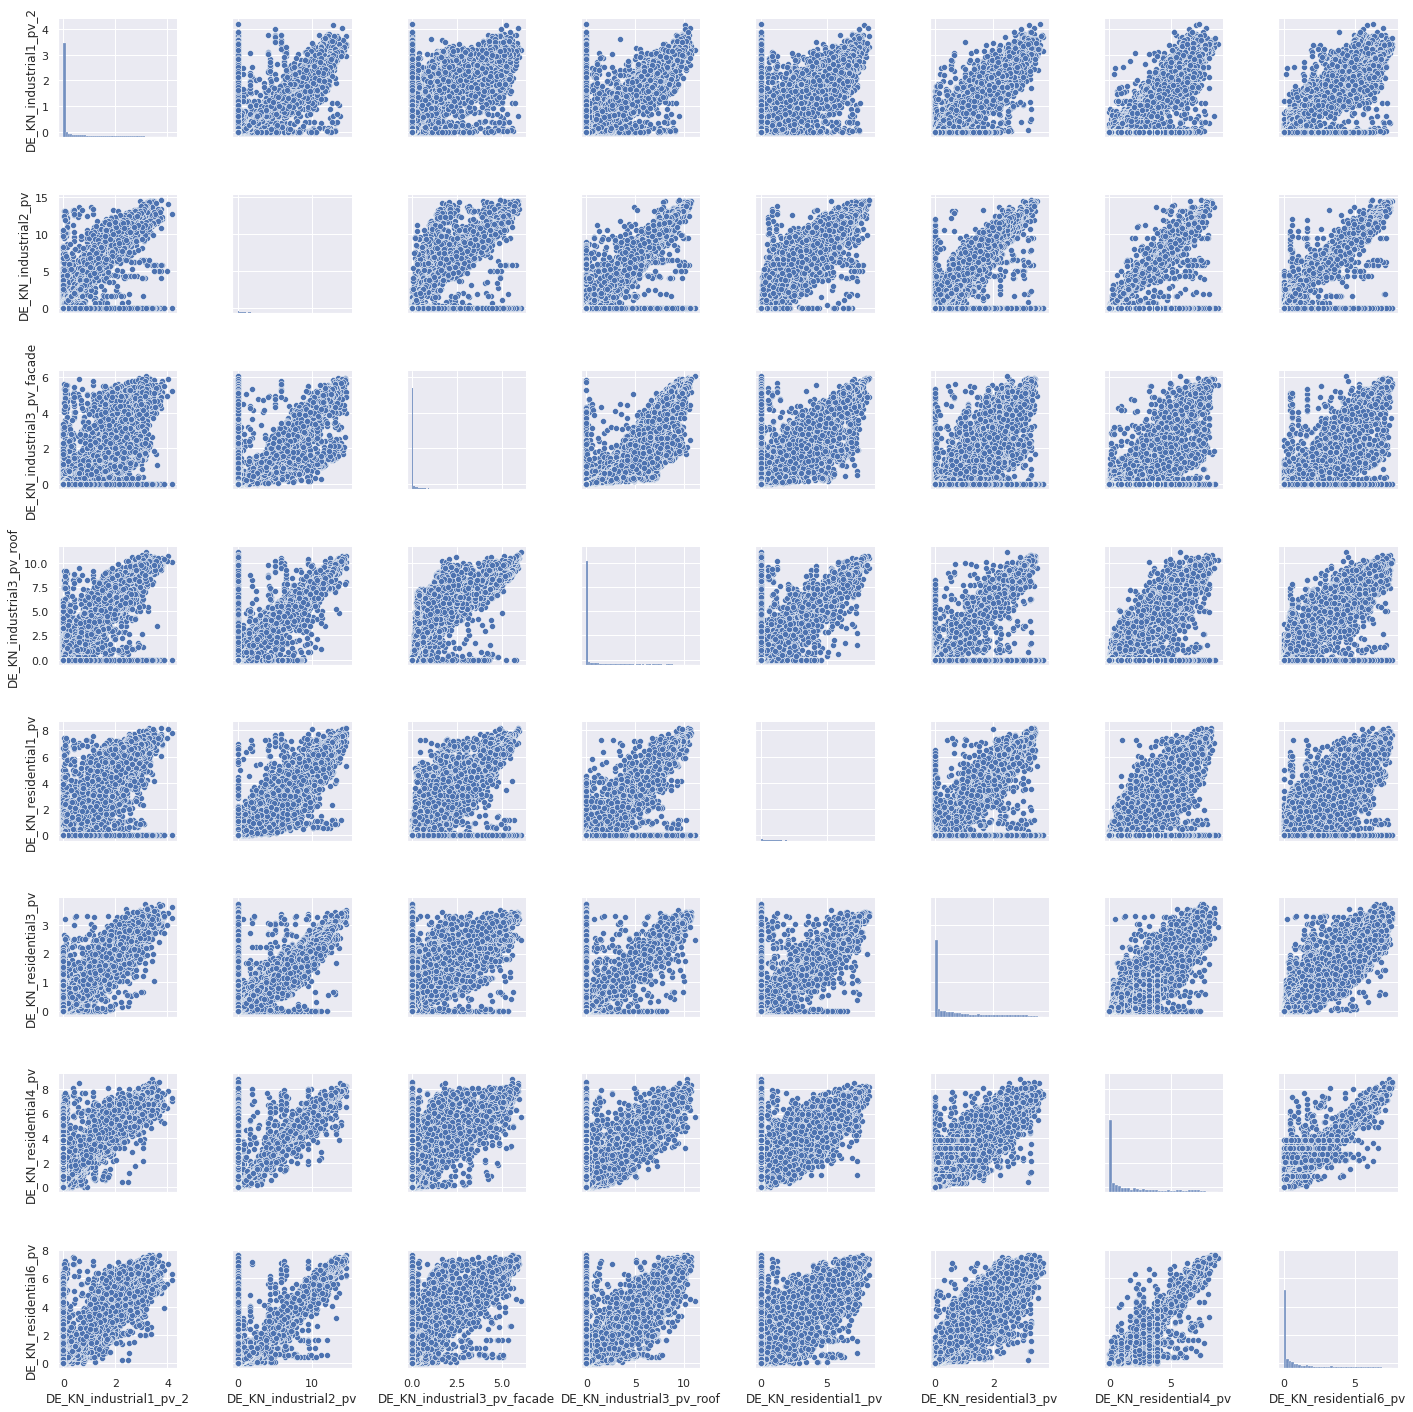

In [ ]:
sns.set()

sns.pairplot(only_pv_cols, size = 2.5)
plt.show();

DE_KN_industrial1_pv_1
DE_KN_industrial1_pv_2
DE_KN_industrial2_pv
DE_KN_industrial3_pv_facade
DE_KN_industrial3_pv_roof
DE_KN_residential1_pv
DE_KN_residential3_pv
DE_KN_residential4_pv
DE_KN_residential6_pv


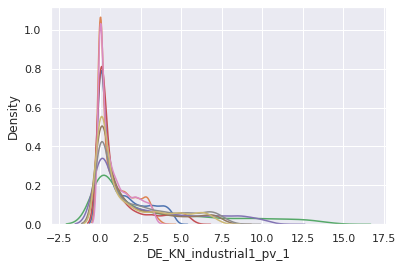

In [ ]:
#distribution analyses

for col in only_pv_cols.columns:
  if "pv" in col:
    print(col)
    sns.kdeplot(GERdata[col], legend=True, x="solar power")


# only_pv_cols.info()
# only_pv_cols['DE_KN_industrial1_pv_2']

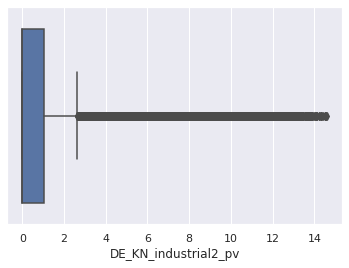

In [ ]:
sns.boxplot(x=only_pv_cols["DE_KN_industrial2_pv"])  #many outliers

In [ ]:
#imputation code sample

#  from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import Imputer
# imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
# logreg = LogisticRegression()
# steps = [('imputation', imp),
#              ('logistic_regression', logreg)]
# pipeline = Pipeline(steps)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#     test_size=0.3, random_state=42)

# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)
# pipeline.score(X_test, y_test)

# Feature Extraction

#Save the dataset

In [ ]:
#save on drive as csv

GERdata_ready= GERdata.to_csv()
with open ("/content/drive/MyDrive/Master_thesis/Datasets/Gerdata_clean.csv", "w") as a:
  a.write(GERdata_ready)

# Feature normalization (scaling or centering)

MixMax scaling 

Feature normalization (or data standardization) of the explanatory (or predictor) variables is a technique used to center and normalise the data by subtracting the mean and dividing by the variance. If you take the mean and variance of the whole dataset you'll be introducing future information into the training explanatory variables (i.e. the mean and variance).

Therefore, you should perform feature normalisation over the training data. Then perform normalisation on testing instances as well, but this time using the mean and variance of training explanatory variables. In this way, we can test and evaluate whether our model can generalize well to new, unseen data points.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#split data based on hours
def split_data(data, test_instances=18):
  # split 
  train, test = data[:-test_instances], data[-test_instances:]   
  return train,test

def scaled(data, scaler_name=MinMaxScaler):
  scaler = scaler_name()
  train,test = split_data(data)
  scaled_train =  scaler.fit_transform(train)
  scaled_test= scaler.transform(test)
  return scaled_train, scaled_test, scaler


scaled_train, scaled_test,_ = scaled(GERdata)

numpy.ndarray

In [ ]:
#Save the normalized dataset
np.savetxt("/content/drive/MyDrive/Master_thesis/Datasets/Gerdata_clean&scaled_train.npy", scaled_train) 
np.savetxt("/content/drive/MyDrive/Master_thesis/Datasets/Gerdata_clean&scaled_test.npy", scaled_test) 


In [ ]:
data = np.loadtxt("/content/drive/MyDrive/Master_thesis/Datasets/Gerdata_clean&scaled_train.npy")
np.shape(data)

(6570, 9)